<a href="https://colab.research.google.com/github/rubel-47/Face-Recognation/blob/main/Face_Recognation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face-recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=dd9a7ac2a27041536a61add7670fb42e583267a58c407ab02e86e4809cf24d5c
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import face_recognition
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
from face_recognition.api import face_encodings

In [ ]:
path = "/content/drive/MyDrive/Machine _Learning_Datasets/images/Rubel.jpg"

unknown_path = "/content/drive/MyDrive/Machine _Learning_Datasets/images/Rubel.jpg"

known_image = face_recognition.load_image_file(file=path)

my_face_encoding = face_recognition.face_encodings(face_image=known_image)[0]


unknown_image = face_recognition.load_image_file(file=unknown_path)

unknown_face_encoding = face_recognition.face_encodings(face_image=unknown_image)[0]


In [ ]:
results = face_recognition.compare_faces(known_face_encodings=[my_face_encoding],
                                         face_encoding_to_check=unknown_face_encoding)

In [ ]:
if results[0] == True:
    print("This is Rubel")
else:
    print("This is not Rita")

This is Rubel


In [ ]:
path = "/content/drive/MyDrive/Machine _Learning_Datasets/images"

images = []

classnames = []

myList = os.listdir(path=path)


In [ ]:
print(myList)

['Rubel.jpg', 'Elon-Musk.jpg', 'Bil-Gates.jpg', 'Unknown-rubel.JPG']


In [ ]:
for img in myList:
    currentImg = cv2.imread(filename=f"{path}/{img}")
    images.append(currentImg)
    classnames.append(os.path.splitext(img)[0])

print(classnames)

['Rubel', 'Elon-Musk', 'Bil-Gates', 'Unknown-rubel']


In [ ]:
def findEncodings(images):
    encodeList = []

    for img in images:
        img = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(face_image=img)[0]
        encodeList.append(encode)
    return encodeList

This is encodeListKnown:  [array([-1.40161797e-01,  7.05118924e-02,  9.13091004e-03, -8.22896659e-02,
       -7.54168630e-02, -4.50172201e-02, -3.02175656e-02, -4.54296693e-02,
        1.62797436e-01, -1.38582051e-01,  2.50930488e-01, -9.53567177e-02,
       -2.30237871e-01, -9.24805403e-02, -7.95884132e-02,  8.21159035e-02,
       -1.60352811e-01, -8.92506614e-02, -1.00930557e-02, -1.26462102e-01,
       -4.46323417e-02, -1.12341270e-02,  4.53631580e-03,  6.02700189e-02,
       -8.91474113e-02, -3.62962693e-01, -7.55929351e-02, -1.22518852e-01,
        3.40116099e-02, -1.27914250e-01, -6.11637086e-02,  1.23856865e-01,
       -1.60084307e-01, -9.51832384e-02, -1.22869238e-02,  1.05664514e-01,
        6.31520078e-02,  6.41735122e-02,  1.79480433e-01,  1.48948058e-02,
       -1.97229162e-02, -8.48767310e-02,  5.33971116e-02,  3.43744546e-01,
        1.19181536e-01,  5.38487583e-02,  1.32082961e-04,  2.97603309e-02,
        1.67516142e-01, -2.69259423e-01,  8.35966915e-02,  6.89922422e-02

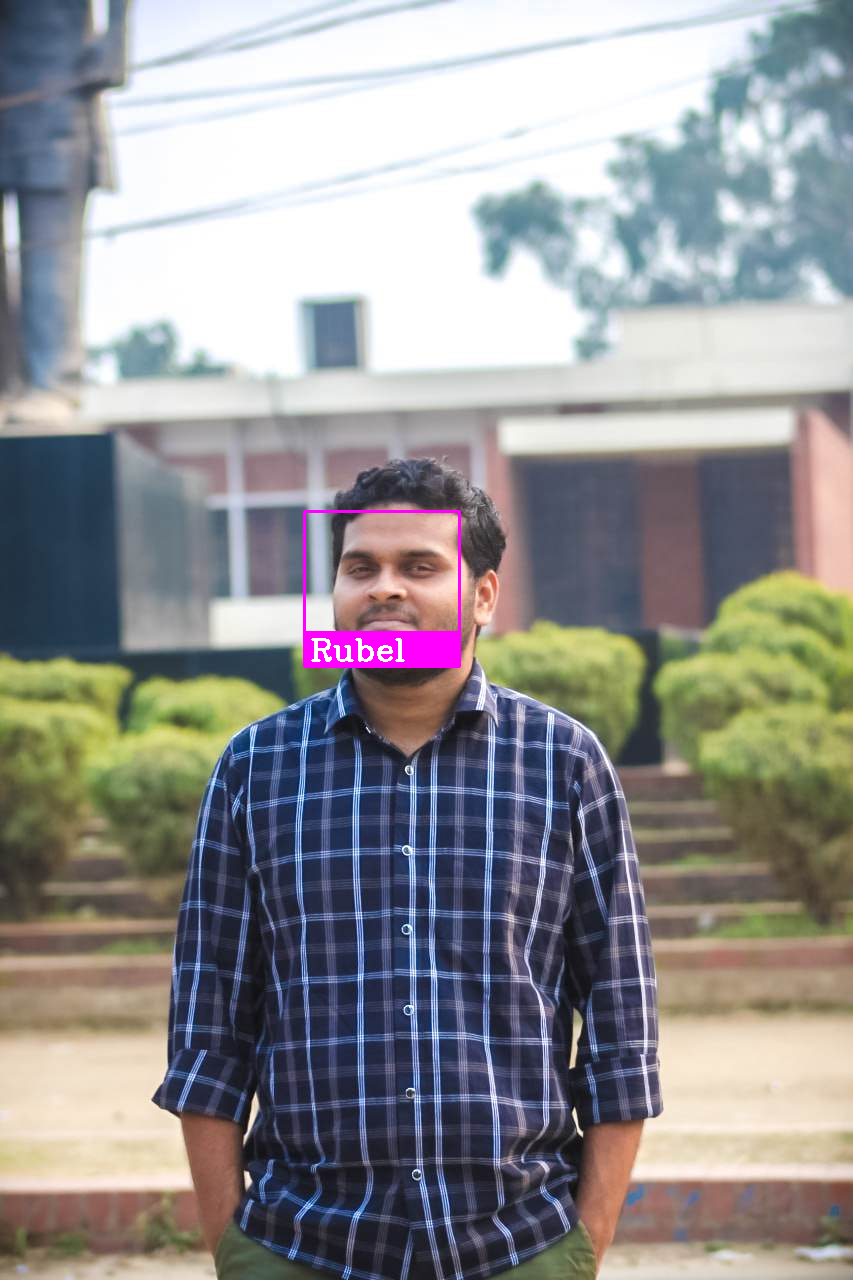

In [ ]:
# from face_recognition.api import face_encodings

encodeListKnown = findEncodings(images)

print("This is encodeListKnown: ", encodeListKnown)
print("*"*60)

# path = "/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN/Images/all_img.jpg"
path = "/content/drive/MyDrive/Machine _Learning_Datasets/images/Rubel.jpg"
unknown_face = cv2.imread(filename=path)

unknown_face_RGB = cv2.cvtColor(src=unknown_face, code=cv2.COLOR_BGR2RGB)


facesCurFrame = face_recognition.face_locations(img=unknown_face_RGB)
print("facesCurFrame",facesCurFrame)
print("*"*60)
encodesCurFrame = face_recognition.face_encodings(face_image=unknown_face_RGB, known_face_locations=facesCurFrame)
print("encodesCurFrame",encodesCurFrame)
print("*"*60)
name = ""
for encodeFace, faceLoc in zip(encodesCurFrame, facesCurFrame):
    matches = face_recognition.compare_faces(known_face_encodings=encodeListKnown, face_encoding_to_check=encodeFace)

    print("faceLoc: ",faceLoc)
    print("*"*60)

    print("matches: ",matches)
    print("*"*60)
    faceDistance = face_recognition.face_distance(face_encodings=encodeListKnown, face_to_compare=encodeFace)

    matchIndex = np.argmin(faceDistance)
    print("matchIndex",matchIndex)
    print("*"*60)

    if matches[matchIndex]:
        name = classnames[matchIndex].capitalize()
        print("Name: ", name)
        print("*"*60)

        y1, x2, y2, x1 = faceLoc # faceLoc:  (63, 162, 138, 88)

        # y1, x2, y2, x1 = y1 * 4, x2 * 4, y2 * 4, x1 * 4

        cv2.rectangle(img=unknown_face,pt1=(x1, y1), pt2=(x2, y2), color=(255,0,255), thickness=2)
        cv2.rectangle(img=unknown_face,pt1=(x1, y2-35), pt2=(x2, y2), color=(255,0,255), thickness=cv2.FILLED)
        cv2.putText(img=unknown_face, text=name, org=(x1+6, y2-6), fontFace=cv2.FONT_HERSHEY_COMPLEX,
                    fontScale=1, color=(255,255,255), thickness=2)

    # y1, x2, y2, x1 = faceLoc # faceLoc:  (63, 162, 138, 88)

    # print(f"y1:{y1}, x2:{x2}, y2:{y2}, x1:{x1}") # y1:63, x2:162, y2:138, x1:88

    # # y1, x2, y2, x1 = y1 * 4, x2 * 4, y2 * 4, x1 * 4

    # cv2.rectangle(img=unknown_face,pt1=(x1, y1), pt2=(x2, y2), color=(255,0,255), thickness=2)
    # # cv2.rectangle(img=unknown_face,pt1=(80, 50), pt2=(150, 150), color=(0,255,255), thickness=2)
    # cv2.rectangle(img=unknown_face,pt1=(x1, y2), pt2=(x2, y2), color=(255,0,255), thickness=cv2.FILLED)
    # cv2.putText(img=unknown_face, text=name, org=(x1+6, y2-6), fontFace=cv2.FONT_HERSHEY_COMPLEX,
    #             fontScale=1, color=(255,255,255), thickness=2)


# cv2.imshow("Image", unknown_face)
cv2_imshow(unknown_face)
cv2.waitKey()
cv2.destroyAllWindows()